In [2]:
library(tidyverse)
library(reshape2)
options(scipen = 999)

In [3]:
#sets up the nessesary categories
df <- read_csv("combined tags.csv", col_types = cols(
  X1 = col_double(),
  Category = col_factor(),
  `Current Channel` = col_factor(),
  `Current Video` = col_factor(),
  `Current Views` = col_double(),
  `Next Channel` = col_factor(),
  Count = col_double(),
  CHANNEL_TITLE = col_factor(),
  TAGS = col_character()
)) %>% select(-`X1`) %>% rename(c("Next Tag" = TAGS,"Current Tag" = Category))


head(df)

Warning message:
"Missing column names filled in: 'X1' [1]"

Current Tag,Current Channel,Current Video,Current Views,Next Channel,Count,CHANNEL_TITLE,Next Tag
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,Michael Knowles,4,Michael Knowles,PartisanRight
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,Lewis Howes,1,NA,Others
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,PatrickCoffin.media,1,NA,Others
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,YAFTV,2,YAFTV,AntiSJW
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,HooverInstitution,1,HooverInstitution,Libertarian
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,The New School,1,NA,Others


In [4]:
#sets up impressions: (views)(recommendations)/recommendations sampled
df <- df %>% group_by(`Current Video`) %>% mutate(total = sum(Count)) %>% mutate(Impressions = `Current Views` * Count/total) %>% select(-total)
df

Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"

Current Tag,Current Channel,Current Video,Current Views,Next Channel,Count,CHANNEL_TITLE,Next Tag,Impressions
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,Michael Knowles,4,Michael Knowles,PartisanRight,4358.8
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,Lewis Howes,1,NA,Others,1089.7
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,PatrickCoffin.media,1,NA,Others,1089.7
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,YAFTV,2,YAFTV,AntiSJW,2179.4
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,HooverInstitution,1,HooverInstitution,Libertarian,1089.7
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,The New School,1,NA,Others,1089.7
PartisanRight,ThePatriotNurse,"Anti-Cancer, Immune Boosters...in the WOODS!",34603,ThePatriotNurse,3,ThePatriotNurse,PartisanRight,10380.9
PartisanRight,ThePatriotNurse,"Anti-Cancer, Immune Boosters...in the WOODS!",34603,Learn Your Land,1,NA,Others,3460.3
PartisanRight,ThePatriotNurse,"Anti-Cancer, Immune Boosters...in the WOODS!",34603,She Is Of The Woods,1,NA,Others,3460.3
PartisanRight,ThePatriotNurse,"Anti-Cancer, Immune Boosters...in the WOODS!",34603,TheWildYam,1,NA,Others,3460.3


In [5]:
# Amount of channels sampled per tag
channelsample <- df %>% group_by(`Current Tag`,`Current Channel`) %>%
summarize() %>% ungroup() %>% mutate(temp = 1) %>% group_by(`Current Tag`) %>%
summarize(`Channels Sampled`= sum(temp)) %>% filter(!is.na(`Current Tag`))

Warning message:
"Factor `Current Tag` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Channel` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Tag` contains implicit NA, consider using `forcats::fct_explicit_na`"

In [7]:
#number of videos sampled per channel
vidsample <- df %>% group_by(`Current Tag`,`Current Video`) %>% summarize() %>% ungroup() %>%
mutate(temp = 1) %>% group_by(`Current Tag`) %>% summarize(`Videos Sampled` = sum(temp)) %>% filter(!is.na(`Current Tag`))

channelsample %>% left_join(vidsample) #%>% summarize(sum(`Channels Sampled`),sum(`Videos Sampled`))

Warning message:
"Factor `Current Tag` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Tag` contains implicit NA, consider using `forcats::fct_explicit_na`"Joining, by = "Current Tag"


Current Tag,Channels Sampled,Videos Sampled
PartisanRight,60,99
Conspiracy,54,100
PartisanLeft,53,100
SocialJustice,60,100
Libertarian,33,100
AntiSJW,57,100
MissingLinkMedia,31,100
WhiteIdentitarian,30,94
AIN,31,100
ManoelAltRight,18,86


In [6]:
#What do each Category send their most impressions to
df %>% filter(`Next Tag` != "Others") %>% group_by(`Current Tag`,`Next Tag`) %>% summarize( Impressions = sum(`Impressions`)) %>%
filter(Impressions == max(Impressions), !is.na(`Current Tag`)) %>% 
select(`Current Tag`, `Next Tag`, `Impressions`) %>% arrange(desc(Impressions))

Current Tag,Next Tag,Impressions
LateNightTalkShow,SocialJustice,38240086.8
Educational,Educational,16035955.4
SocialJustice,SocialJustice,11856587.4
PartisanLeft,PartisanLeft,11319986.9
AntiTheist,AntiTheist,3567087.1
AntiSJW,Conspiracy,3431109.0
Mainstream News,Mainstream News,3115057.7
ManoelAltLite,PartisanRight,1845211.2
MissingLinkMedia,MissingLinkMedia,1589972.7
Libertarian,Libertarian,1558393.0


In [7]:
#tags back to itself 

Warning message:
"Factor `Current Tag` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `Current Video` contains implicit NA, consider using `forcats::fct_explicit_na`"

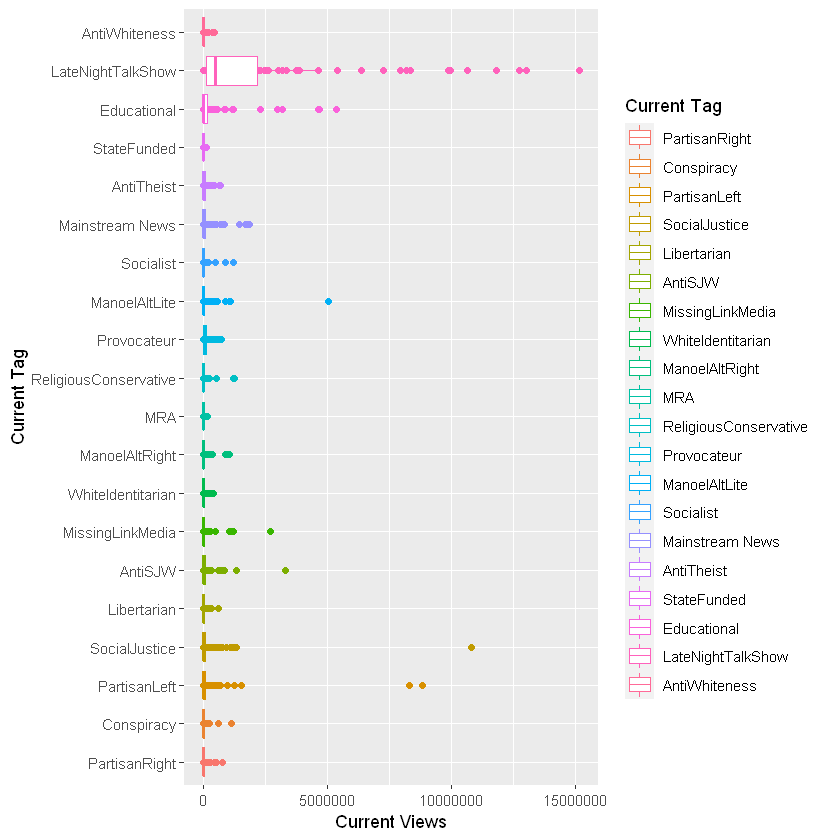

In [8]:
#average views for each category - LATENIGHTTALKSHOW
views <- df %>% group_by(`Current Tag`,`Current Video`,`Current Views`) %>% summarize() %>% filter(!is.na(`Current Views`))
views %>% ggplot(aes(x=`Current Tag`, y = `Current Views`, color = `Current Tag`)) + geom_point() + geom_boxplot() + coord_flip()

Warning message:
"Removed 77 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 77 rows containing missing values (geom_point)."

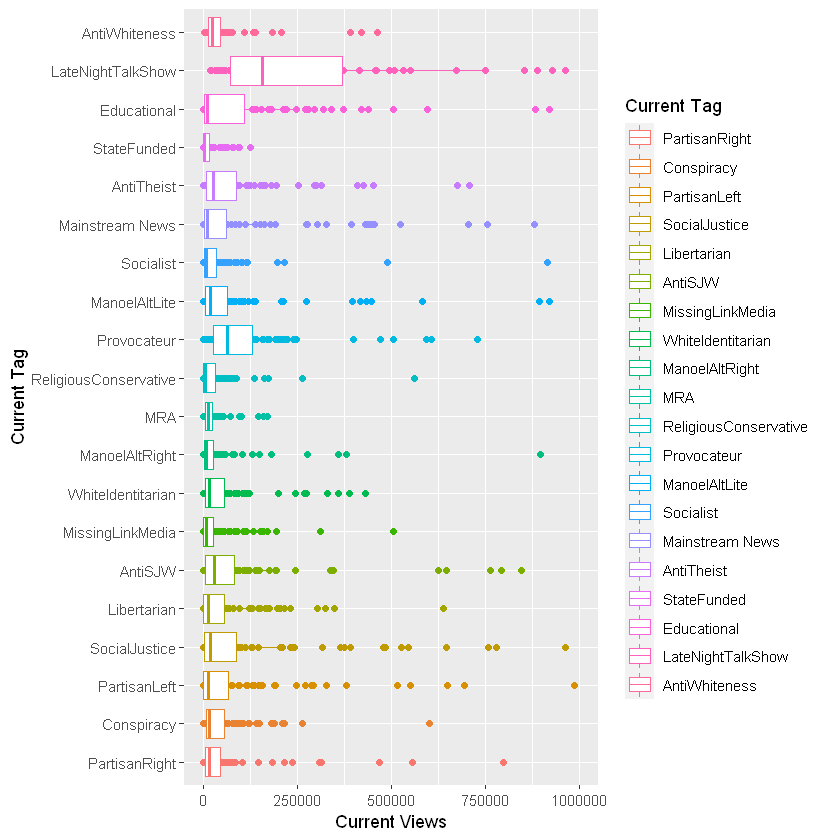

In [9]:
#average views for each category - NO LATENIGHTTALKSHOW
views %>% ggplot(aes(x=`Current Tag`, y = `Current Views`, color = `Current Tag`)) + geom_point() +
geom_boxplot() + coord_flip() + ylim(0,1000000)

In [10]:
#distribution of sent impressionss
#df %>% 

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: #distribution of sent impressionss
2: df %>% 
  ^


Using Current Tag as id variables


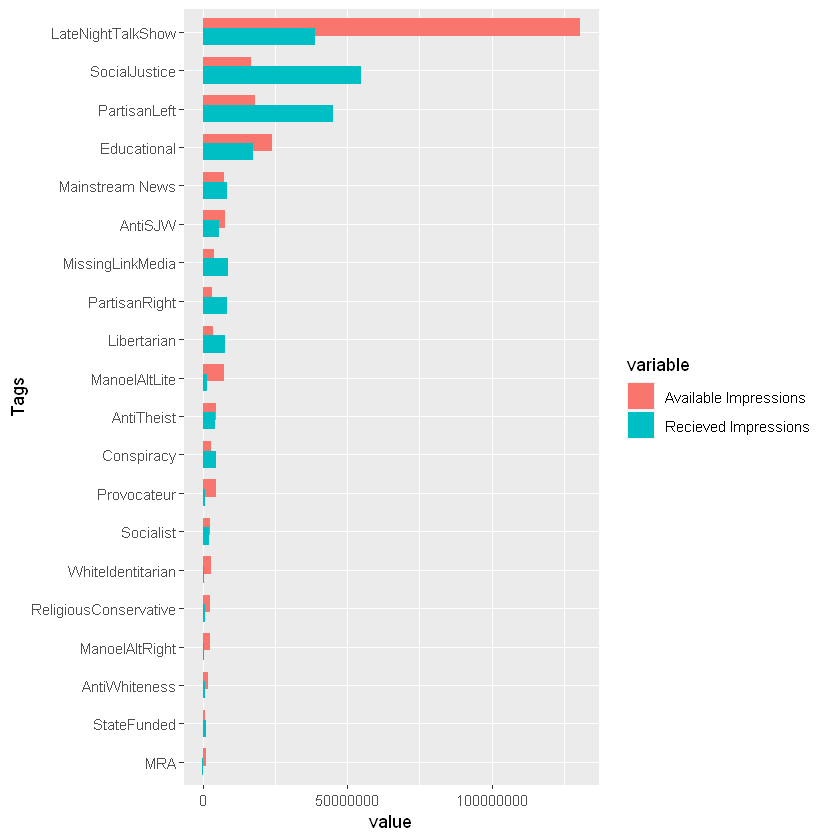

In [16]:
impressions <- df %>% filter(`Next Tag` != "Others") %>% group_by(`Current Tag`) %>% mutate(`Available Impressions` = sum(Impressions)) %>%
ungroup() %>% group_by(`Next Tag`) %>% mutate(`Recieved Impressions` = sum(Impressions)) %>% ungroup() %>%
filter(`Current Tag` == `Next Tag`) %>% select(`Current Tag`,`Available Impressions`,`Recieved Impressions`) %>%
unique() 

impressions %>% melt(vars = `Current Tag`) %>% 
ggplot(aes(x = reorder(`Current Tag`,`value`),y = value)) + geom_bar(aes(fill = variable), stat = "identity",
                                           position = position_dodge(width = -0.5)) +coord_flip() + xlab("Tags")

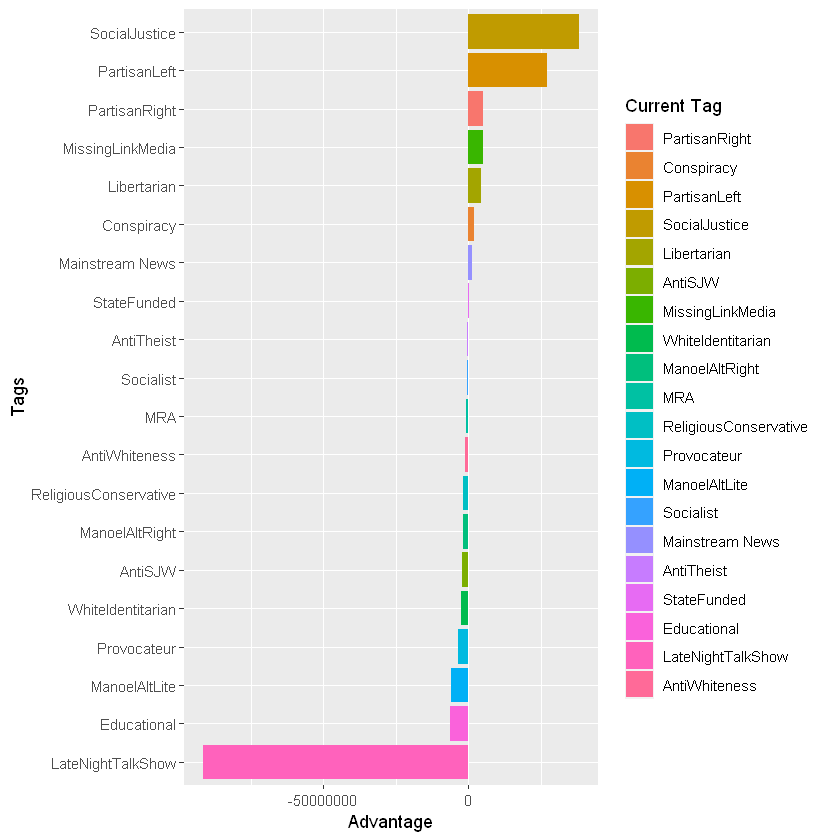

In [14]:
impressions %>% mutate(Advantage = `Recieved Impressions` - `Available Impressions`) %>%
ggplot(aes(x= reorder(`Current Tag`,Advantage), y = Advantage)) + geom_bar(stat = "identity", aes(fill = `Current Tag`)) +
coord_flip() + xlab("Tags")